In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
dataset.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [11]:
selectedData = dataset.iloc[:, [1, 2, 4, 8, 9, 10, 11, 12]]
selectedData.head(5)

,Gender,Age,Sleep Duration,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,6.1,Overweight,126/83,77,4200,None
1,Male,28,6.2,Normal,125/80,75,10000,None
2,Male,28,6.2,Normal,125/80,75,10000,None
3,Male,28,5.9,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,5.9,Obese,140/90,85,3000,Sleep Apnea


In [12]:
selectedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          374 non-null    object 
 1   Age             374 non-null    int64  
 2   Sleep Duration  374 non-null    float64
 3   BMI Category    374 non-null    object 
 4   Blood Pressure  374 non-null    object 
 5   Heart Rate      374 non-null    int64  
 6   Daily Steps     374 non-null    int64  
 7   Sleep Disorder  374 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 23.5+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

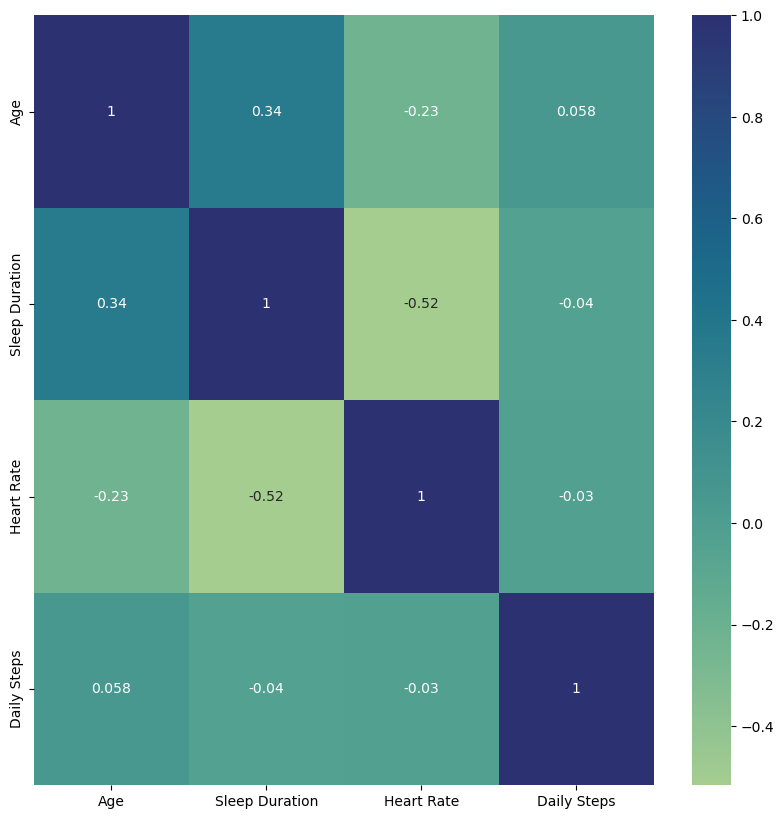

In [6]:
plt.figure(figsize = (10, 10))
sns.heatmap(selected_columns.corr(), cmap = 'crest', annot = True)
plt.show

Heartrate and sleep duration might be negatively correlated. 

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder=LabelEncoder()

In [14]:
cat_cols=['Gender','Age','Sleep Duration', 'BMI Category','Blood Pressure', 'Heart Rate', 'Daily Steps']
copy_full = selectedData
for col in cat_cols:
    copy_full[col] = label_encoder.fit_transform(copy_full[col])

copy_full.tail(2)

,Gender,Age,Sleep Duration,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,0,30,22,3,23,2,15,Sleep Apnea
373,0,30,22,3,23,2,15,Sleep Apnea


In [49]:
scaler = StandardScaler()
features = copy_full.drop('Sleep Disorder', axis=1) # Target column
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.9893614 , -1.84255486, -1.29517057, ..., -0.29825781,
         1.76650033, -1.69073033],
       [ 0.9893614 , -1.7163201 , -1.1621319 , ..., -0.58030185,
         1.18261069,  1.17249881],
       [ 0.9893614 , -1.7163201 , -1.1621319 , ..., -0.58030185,
         1.18261069,  1.17249881],
       ...,
       [-1.010753  ,  1.94448773,  1.23256414, ...,  1.39400646,
        -0.56905822,  0.29150523],
       [-1.010753  ,  1.94448773,  1.23256414, ...,  1.39400646,
        -0.56905822,  0.29150523],
       [-1.010753  ,  1.94448773,  1.23256414, ...,  1.39400646,
        -0.56905822,  0.29150523]])

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, 
    copy_full['Sleep Disorder'], 
    test_size=0.2, 
    random_state=42
)

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the values
predicted = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predicted))

# Confusion matrix
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix : \n", conf)

cr = classification_report(y_test, predicted)
print("Classification Report:\n", cr)

Accuracy:  0.88
Confusion Matrix : 
 [[14  1  1]
 [ 3 40  0]
 [ 2  2 12]]
Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.74      0.88      0.80        16
        None       0.93      0.93      0.93        43
 Sleep Apnea       0.92      0.75      0.83        16

    accuracy                           0.88        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.88      0.88        75



## Use a random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
from sklearn.metrics import classification_report, accuracy_score

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[13  1  2]
 [ 1 42  0]
 [ 3  1 12]]
              precision    recall  f1-score   support

    Insomnia       0.76      0.81      0.79        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75

Accuracy: 0.8933333333333333


## Using a SVM

In [57]:
from sklearn.svm import SVC

In [70]:
svm_model = SVC(random_state=42)

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

              precision    recall  f1-score   support

    Insomnia       0.72      0.81      0.76        16
        None       0.95      0.95      0.95        43
 Sleep Apnea       0.86      0.75      0.80        16

    accuracy                           0.88        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.88      0.88      0.88        75

Accuracy: 0.88
Confusion Matrix:
[[13  1  2]
 [ 1 42  0]
 [ 3  1 12]]


## KNN nearist neighbour

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [62]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


In [64]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[14  1  1]
 [ 2 41  0]
 [ 5  1 10]]
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.67      0.88      0.76        16
        None       0.95      0.95      0.95        43
 Sleep Apnea       0.91      0.62      0.74        16

    accuracy                           0.87        75
   macro avg       0.84      0.82      0.82        75
weighted avg       0.88      0.87      0.87        75



## Decision Trees## 

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [78]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
y_pred = decision_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8933333333333333


In [80]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[13  1  2]
 [ 1 42  0]
 [ 3  1 12]]
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.76      0.81      0.79        16
        None       0.95      0.98      0.97        43
 Sleep Apnea       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



In [81]:
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Decision Tree',]
accuracy_scores = [88, 89.3, 89.3, 88, 89.3]  
, 
data = {'Model': model_names, 'Accuracy Score': accuracy_scores}

df = pd.DataFrame(data)

colors = px.colors.qualitative.Pastel

fig = px.bar(df, x='Model', y='Accuracy Score', text='Accuracy Score', 
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map={model: color for model, color in zip(model_names, colors)})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

In [89]:
selectedData

,Gender,Age,Sleep Duration,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,0,3,3,11,10,6,None
1,1,1,4,0,9,8,19,None
2,1,1,4,0,9,8,19,None
3,1,1,1,2,22,17,0,Sleep Apnea
4,1,1,1,2,22,17,0,Sleep Apnea
...,...,...,...,...,...,...,...,...
369,0,30,22,3,23,2,15,Sleep Apnea
370,0,30,21,3,23,2,15,Sleep Apnea
371,0,30,22,3,23,2,15,Sleep Apnea
372,0,30,22,3,23,2,15,Sleep Apnea


In [85]:
def get_user_input():
    print("Gender: Male = 1, Female = 0")
    gender = int(input("Enter your gender: "))
    age = int(input("Enter your age: "))
    sleep_duration = float(input("Enter sleep duration in hours: "))
    print("BMI Categories: Underweight = 1, Normal = 2, Overweight = 3, Obese = 4")
    bmi_category = int(input("Enter your BMI category: "))
    blood_pressure = int(input("Enter your blood pressure: "))
    heart_rate = int(input("Enter heart rate (bpm): "))
    daily_steps = int(input("Enter your daily steps: "))
                                 

    return np.array([[gender, age, sleep_duration, bmi_category, blood_pressure, heart_rate, daily_steps]])

In [91]:
model = decision_tree 

user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)
predicted = model.predict(user_input_scaled)
print("Predicted Category:", predicted[0])

Gender: Male = 1, Female = 0
Enter your gender: 1
Enter your age: 1
Enter sleep duration in hours: 1
BMI Categories: Underweight = 1, Normal = 2, Overweight = 3, Obese = 4
Enter your BMI category: 1
Enter your blood pressure: 1
Enter heart rate (bpm): 1
Enter your daily steps: 1
Predicted Category: None
